# Multiple variable Regression

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from pylab import rcParams
from sklearn.linear_model import LinearRegression
import seaborn as sb
sb.set_style("whitegrid")
from collections import Counter
from sklearn import datasets


In [13]:
%matplotlib inline
rcParams["figure.figsize"]=10,8

In [14]:
iris =  datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


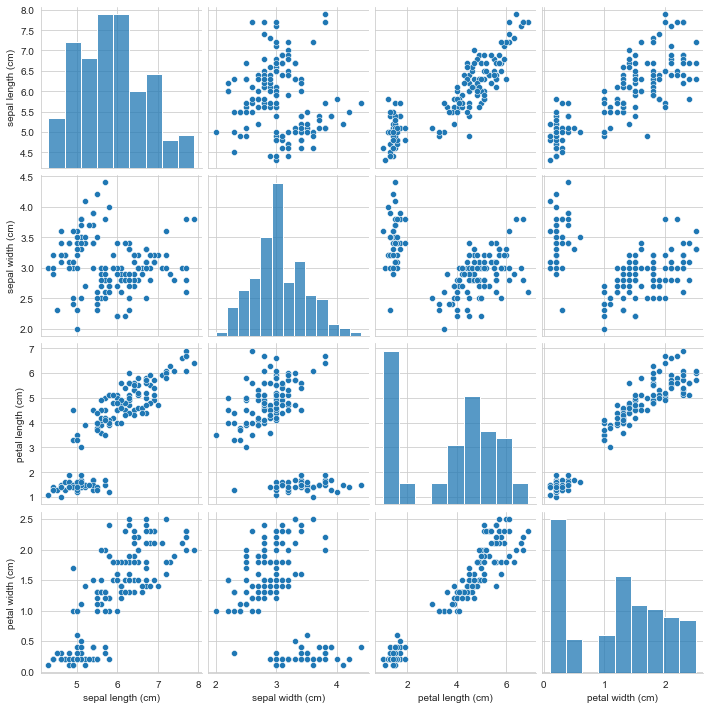

In [15]:
sb.pairplot(df)

## Finding correlation between variables

In [16]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

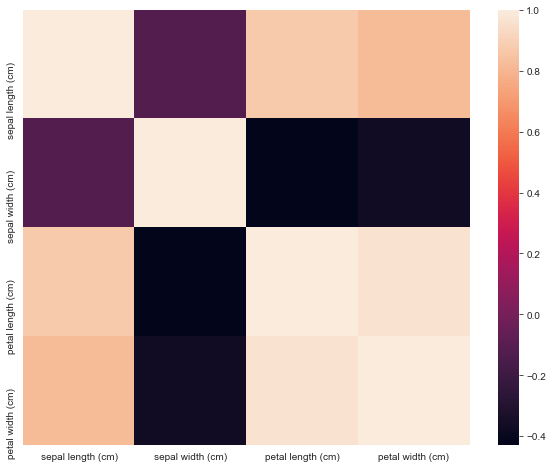

In [50]:
sb.heatmap(df.corr())

In [29]:
petalLen= df[["petal length (cm)"]].values
sepalVar= df[["sepal length (cm)","sepal width (cm)"]].values
sepalVar_names=["sepalLen","sepalWid"]
# sepal width has a bad correlation with petal length but lets try it as example
print(petalLen[1:10])
print(sepalVar[1:10])

[[1.4]
 [1.3]
 [1.5]
 [1.4]
 [1.7]
 [1.4]
 [1.5]
 [1.4]
 [1.5]]
[[4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]


In [31]:
x,y = sepalVar,petalLen

In [32]:
missing_values= x== np.NAN
x[missing_values == True]

array([], dtype=float64)

In [48]:
linReg= LinearRegression()
linReg.fit(x,y)
print("Intercep = ",linReg.intercept_,"Coeficients = ",linReg.coef_)
print(linReg.score(x,y))
a= linReg.intercept_
b= linReg.coef_[0][0]
c= linReg.coef_[0][1]

Intercep =  [-2.52476151] Coeficients =  [[ 1.77559255 -1.33862329]]
0.8676860089345194


In [47]:
# Long way to display differences
for i in range(20):
    sepalLen= sepalVar[i][0]
    sepalWid= sepalVar[i][1]
#     print(sepalLen,sepalWid)
    yReg= b* sepalLen+c*sepalWid+a
    print(petalLen[i][0],yReg)

1.4 [1.84557896]
1.4 [2.1597721]
1.3 [1.53692893]
1.5 [1.49323201]
1.4 [1.53415738]
1.7 [1.84280741]
1.4 [1.09164502]
1.5 [1.80188204]
1.4 [1.40583816]
1.5 [2.02590977]
1.5 [2.11053207]
1.6 [1.44676353]
1.4 [1.98221285]
1.1 [1.09441657]
1.2 [2.4191821]
1.5 [1.70617353]
1.3 [1.84280741]
1.4 [1.84557896]
1.7 [2.50934751]
1.5 [1.44399198]


In [54]:
# Another way to display differences
oo=linReg.predict(sepalVar)
for i in range(10):
    print(oo[i],petalLen[i])

[1.84557896] [1.4]
[2.1597721] [1.4]
[1.53692893] [1.3]
[1.49323201] [1.5]
[1.53415738] [1.4]
[1.84280741] [1.7]
[1.09164502] [1.4]
[1.80188204] [1.5]
[1.40583816] [1.4]
[2.02590977] [1.5]
